## Import libraries


In [36]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

### Import data

In [5]:
cwd = os.getcwd()
simp_path = 'raw_data/df.csv'
abs_path = os.path.abspath(os.path.join(cwd,'..',simp_path))
df_sarimax = pd.read_csv(abs_path)

In [6]:
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY


In [7]:
df_sarimax["spread"] = df_sarimax["open"] - df_sarimax["close"]
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector,spread
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY,0.000000
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY,0.002232
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY,0.002232
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY,0.000000
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY,0.000000


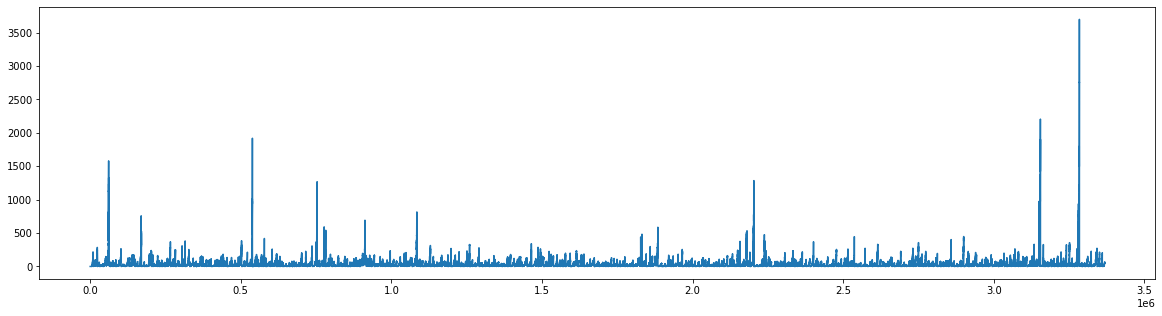

In [8]:
plt.figure(figsize=(20,5))
plt.plot(df_sarimax.adj_close);

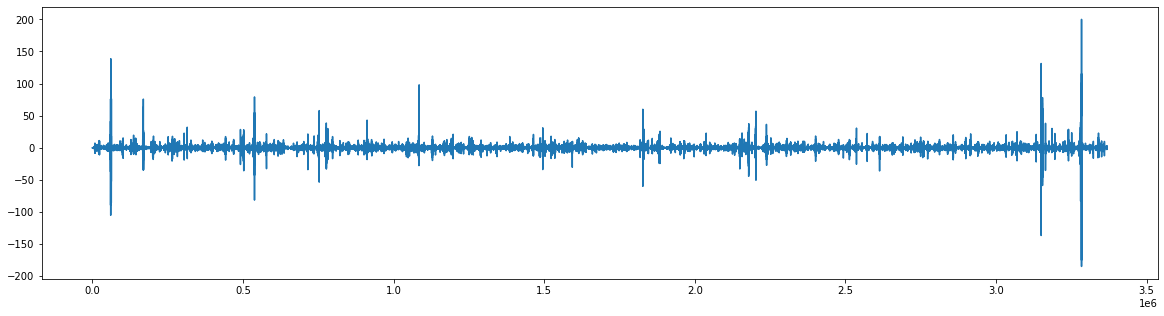

In [9]:
plt.figure(figsize=(20,5))
plt.plot(df_sarimax.spread);

In [7]:
#plt.plot(df_sarimax.adj_close);
#Ask Sandra later for the adj_close 

In [10]:
df_groupby = df_sarimax.groupby(["ticker"])["spread"].median()
df_groupby

ticker
A      -0.021460
AAL     0.020000
AAP     0.000000
AAPL    0.000000
ABBV   -0.079998
          ...   
YUM    -0.014378
ZBH    -0.050003
ZBRA    0.000000
ZION    0.000000
ZTS     0.010000
Name: spread, Length: 481, dtype: float64

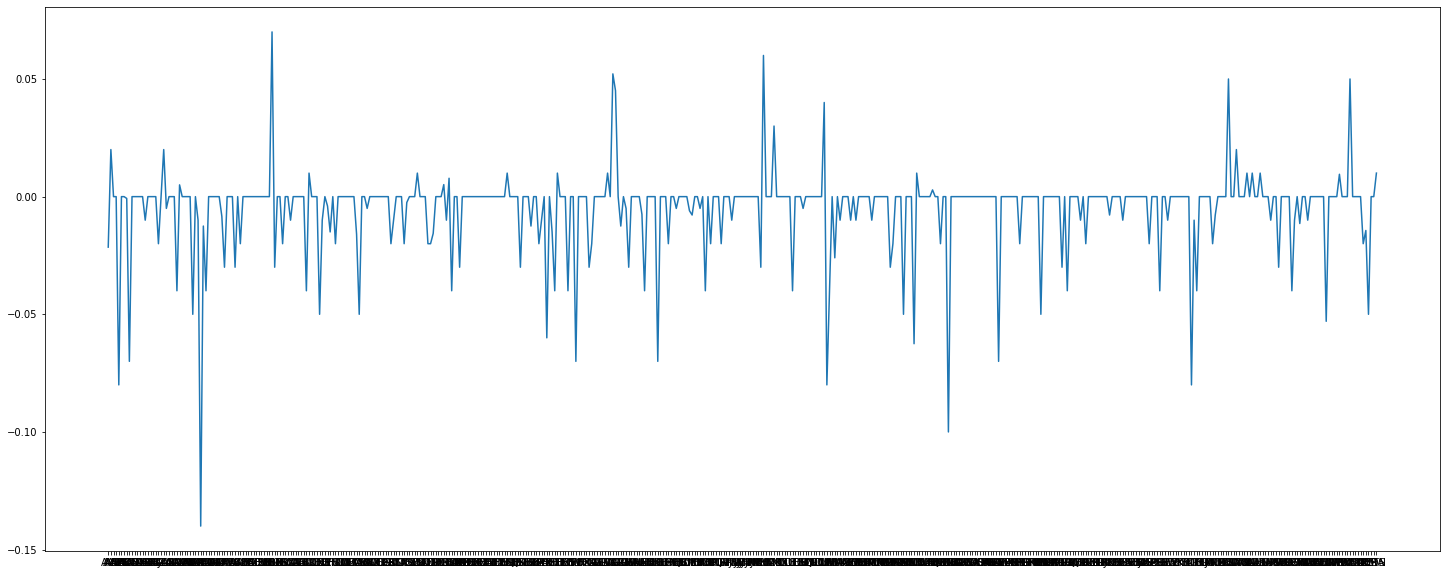

In [11]:
plt.figure(figsize=(25,10))
plt.plot(df_groupby);

In [10]:
#df_sarimax = df_sarimax[]
#pd.to_datetime(df["date"], format='%Y%m%d', errors='ignore')

In [12]:
df_sarimax["date"] = pd.to_datetime(df_sarimax["date"], infer_datetime_format=True)
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector,spread
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY,0.000000
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY,0.002232
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY,0.002232
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY,0.000000
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY,0.000000


In [13]:
df_sarimax["date"].dtype

dtype('<M8[ns]')

In [14]:
df_sarimax.reset_index()
df_sarimax = df_sarimax.set_index(df_sarimax["date"])
df_sarimax = df_sarimax.drop("date", axis=1)

In [15]:
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector,spread
date,,,,,,,,,
1980-12-12,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,TECHNOLOGY,0.000000
1980-12-15,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,TECHNOLOGY,0.002232
1980-12-16,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,TECHNOLOGY,0.002232
1980-12-17,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,TECHNOLOGY,0.000000
1980-12-18,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,TECHNOLOGY,0.000000


### Decomposition

In [16]:
df_sarimax = df_sarimax[(df_sarimax.index)>"1999-12-31"]
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector,spread
date,,,,,,,,,
2000-01-03,AAPL,3.745536,3.997768,2.686497,3.631696,4.017857,133949200,TECHNOLOGY,-0.252232
2000-01-04,AAPL,3.866071,3.660714,2.459998,3.613839,3.950893,128094400,TECHNOLOGY,0.205357
2000-01-05,AAPL,3.705357,3.714286,2.495997,3.678571,3.948661,194580400,TECHNOLOGY,-0.008929
2000-01-06,AAPL,3.790179,3.392857,2.279998,3.392857,3.821429,191993200,TECHNOLOGY,0.397321
2000-01-07,AAPL,3.446429,3.553571,2.387998,3.410714,3.607143,115183600,TECHNOLOGY,-0.107143


In [17]:
df_telekom = df_sarimax[df_sarimax["ticker"]== "T"]
df_telekom.head()

,ticker,open,close,adj_close,low,high,volume,sector,spread
date,,,,,,,,,
2000-01-03,T,48.5625,47.0000,19.225044,46.6250,49.00,5791900,PUBLIC UTILITIES,1.5625
2000-01-04,T,47.0625,44.2500,18.100174,43.5000,47.75,7173600,PUBLIC UTILITIES,2.8125
2000-01-05,T,45.0000,44.9375,18.381397,44.4375,45.25,9090000,PUBLIC UTILITIES,0.0625
2000-01-06,T,44.5625,43.7500,17.993273,43.1250,45.00,7153600,PUBLIC UTILITIES,0.8125
2000-01-07,T,44.5625,44.1250,18.147497,43.3750,44.75,5885600,PUBLIC UTILITIES,0.4375


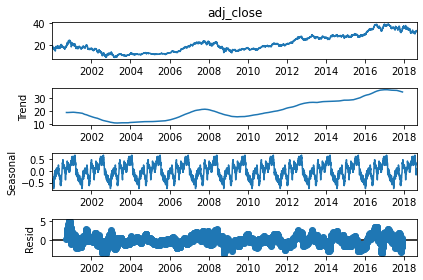

In [18]:
# additive Decomposition (y = Trend * Seasonal * Residuals)
result_add_T = seasonal_decompose(df_telekom['adj_close'], model='additive', period=365)
result_add_T.plot();

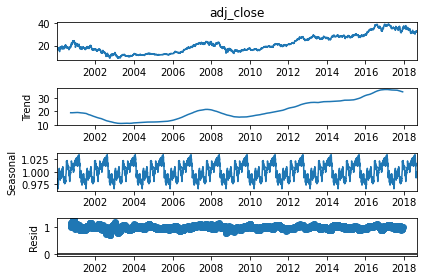

In [39]:
#Multiplicative Decomposition
result_mult_T = seasonal_decompose(df_telekom['adj_close'], model='multiplicative', period=365)
result_mult_T.plot();

### Check for stationality

In [1]:
# Plot the residuals with "result_add.resid" to decide
#f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
#ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
#ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

In [46]:
result_mult_T.__dict__

{'_seasonal': date
 2000-01-03    0.985170
 2000-01-04    0.983190
 2000-01-05    0.977054
 2000-01-06    0.978178
 2000-01-07    0.982755
                 ...   
 2018-08-20    0.991055
 2018-08-21    0.994408
 2018-08-22    0.998287
 2018-08-23    1.000208
 2018-08-24    0.996673
 Name: seasonal, Length: 4692, dtype: float64,
 '_trend': date
 2000-01-03   NaN
 2000-01-04   NaN
 2000-01-05   NaN
 2000-01-06   NaN
 2000-01-07   NaN
               ..
 2018-08-20   NaN
 2018-08-21   NaN
 2018-08-22   NaN
 2018-08-23   NaN
 2018-08-24   NaN
 Name: trend, Length: 4692, dtype: float64,
 '_weights': date
 2000-01-03    1.0
 2000-01-04    1.0
 2000-01-05    1.0
 2000-01-06    1.0
 2000-01-07    1.0
              ... 
 2018-08-20    1.0
 2018-08-21    1.0
 2018-08-22    1.0
 2018-08-23    1.0
 2018-08-24    1.0
 Name: weights, Length: 4692, dtype: float64,
 '_resid': date
 2000-01-03   NaN
 2000-01-04   NaN
 2000-01-05   NaN
 2000-01-06   NaN
 2000-01-07   NaN
               ..
 2018-08-20   N

In [21]:
adfuller(df_telekom.adj_close)[1]  # p-value

0.8011297307453698

In [32]:
print("p-value: ", adfuller(df_telekom["adj_close"])[1])

p-value:  0.8011297307453698


### Autocorrelation

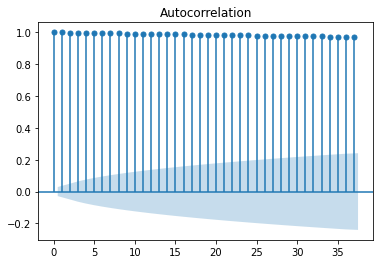

In [26]:
y = df_telekom.adj_close
#plot_acf(df_telekom["adj_close"], lags=50)
plot_acf(y);

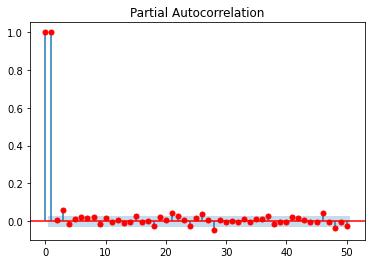

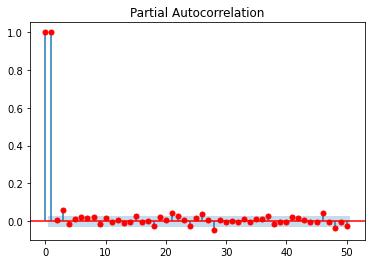

In [30]:
plot_pacf(df_telekom.adj_close, lags=50, c='r')
#plt.show()

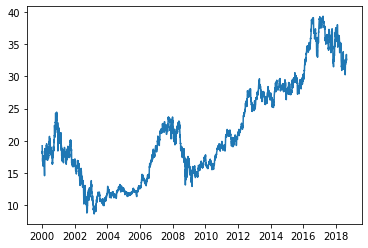

In [33]:
#Plot telekom stock
plt.plot(df_telekom.adj_close);

## Building the SARIMA model

In [42]:
#I make the log to run the SARIMA MODel
#df["log_adjust"] = df["adjust"].map(lambda x: log(x))

In [43]:
#convert again to exponential form to make the predictions
#df[‘log_adj_close’] = df[‘adj_close’].map(lambda x: log(x))
#exp(x)

In [38]:
model = pm.auto_arima(df_telekom["adj_close"],
                      m=365, # frequency of series. Important to choose manually
                      seasonal=False,
                      stepwise=True,  # only check most interesting combination. False will take way longer.
                      start_p=0, max_p=2,
                      start_d=0, max_d=1,
                      start_q=0, max_q=2,
                      start_P=0, max_P=2,
                      start_D=0, max_D=2,
                      start_Q=0, max_Q=2,
                      njobs=-1, trace=True, error_action="ignore",  suppress_warnings=True)
print(model.summary())

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (365) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2305.187, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2306.991, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2306.962, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2303.588, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2296.826, Time=5.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2290.633, Time=4.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2289.113, Time=1.35 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2287.580, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2305.398, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2289.118, Time=1.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2295.410, Time=1.49 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 18.209 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 